## I've written this as a function, make sure you have analysis.py in your same folder

### from analysis import sentimentify

#### Check out Graphs.ipynb for a fun treat :3

In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Read the file

filename = "Raw_Data/season1.json"
with open(filename, "r") as data_file:
    data = json.load(data_file)

In [8]:
# Extract files and set up

topandas = []
eptitles = []
for episode in data.keys():
    eptitles.append(episode[16:-4])
    for key, line in data[episode].items():
#         lines.append(line)
        results = analyzer.polarity_scores(line)
        if results["compound"] != 0:
            topandas.append({
                "Ep": episode[16:-4], #Remove Game of Thrones & .srt from string
                "Line": line,
                "Compound": results["compound"],
                "Positive": results["pos"],
                "Neutral": results["neu"],
                "Negative": results["neg"],
                "Timestamp?": key
            })

In [9]:
df = pd.DataFrame(topandas)
df = df[["Ep", "Timestamp?", "Line", "Compound", "Positive", "Neutral", "Negative"]]
df.head(1)

,Ep,Timestamp?,Line,Compound,Positive,Neutral,Negative
0,S01E01 Winter Is Coming,1,"Easy, boy.",0.4404,0.744,0.256,0.0


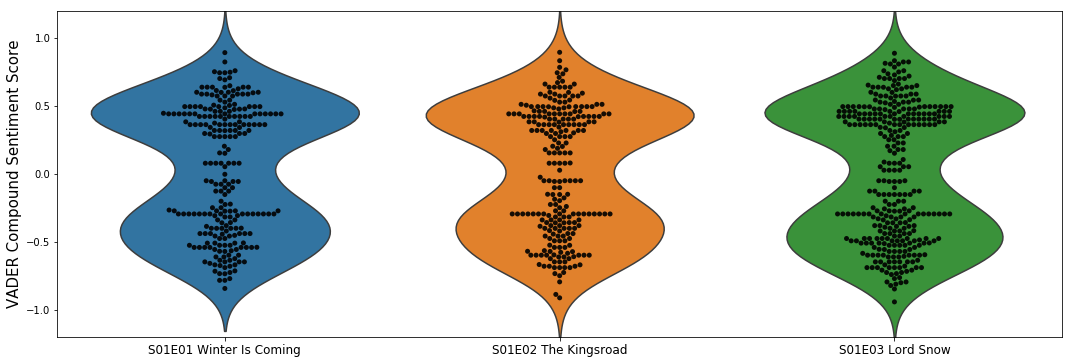

In [10]:
# Plot each episode
plt.close()
plt.figure(figsize=(18,6))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Ep',y='Compound',data=df[df['Ep'].isin(eptitles[:3])],inner=None)
sns.swarmplot(x="Ep", y="Compound",data=df[df['Ep'].isin(eptitles[:3])], color="black", alpha=.9);
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1_1.png')
plt.show()

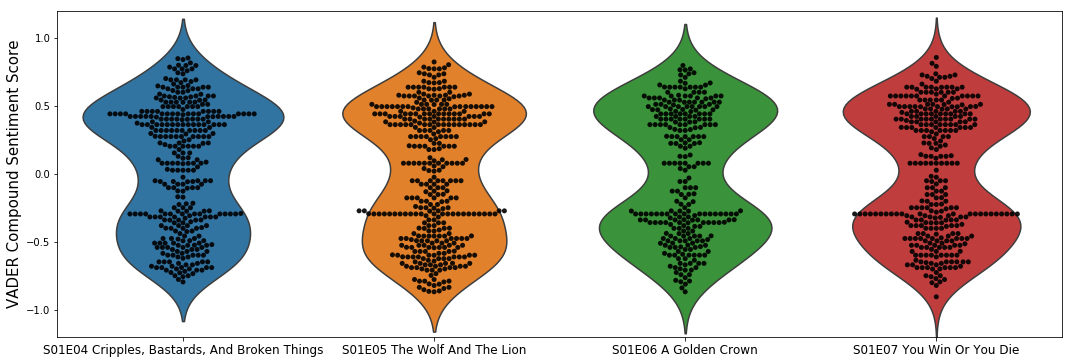

In [11]:
plt.close()
plt.figure(figsize=(18,6))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Ep',y='Compound',data=df[df['Ep'].isin(eptitles[3:7])],inner=None)
sns.swarmplot(x="Ep", y="Compound",data=df[df['Ep'].isin(eptitles[3:7])], color="black", alpha=.9);
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1_2.png')
plt.show()

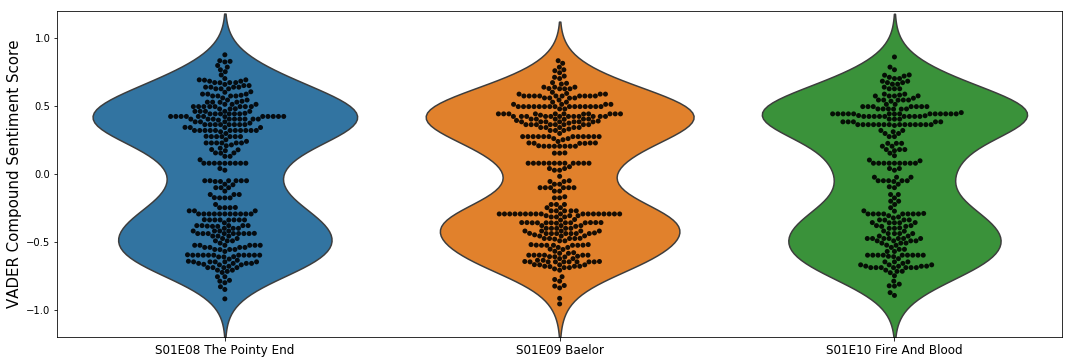

In [12]:
plt.close()
plt.figure(figsize=(18,6))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Ep',y='Compound',data=df[df['Ep'].isin(eptitles[7:])],inner=None)
sns.swarmplot(x="Ep", y="Compound",data=df[df['Ep'].isin(eptitles[7:])], color="black", alpha=.9);
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1_3.png')
plt.show()

In [ ]:
# # Run VADER on each episode, ignore sentiment score of 0 lines

# sentiments = {}
# sentiment_list = []
# for episode in season1:
#     for line in season1[episode]:
#         results = analyzer.polarity_scores(line)
        
#         # Only add non-zero results
#         if results["compound"] != 0:
#             sentiment_list.append(results)
#     sentiments[episode] = sentiment_list
#     sentiment_list = []

In [ ]:
# # Each ep its own dataframe

# ep1_df = pd.DataFrame(sentiments["Ep1"])
# ep1_df["Name"] = eptitles[0]
# ep2_df = pd.DataFrame(sentiments["Ep2"])
# ep2_df["Name"] = eptitles[1]
# ep3_df = pd.DataFrame(sentiments["Ep3"])
# ep3_df["Name"] = eptitles[2]
# ep4_df = pd.DataFrame(sentiments["Ep4"])
# ep4_df["Name"] = eptitles[3]
# ep5_df = pd.DataFrame(sentiments["Ep5"])
# ep6_df = pd.DataFrame(sentiments["Ep6"])
# ep7_df = pd.DataFrame(sentiments["Ep7"])
# ep8_df = pd.DataFrame(sentiments["Ep8"])
# ep9_df = pd.DataFrame(sentiments["Ep9"])
# ep10_df = pd.DataFrame(sentiments["Ep10"])
# ep1_df.head()

In [ ]:
# # Make a DF of average values because..?

# mean_df = pd.DataFrame({
#     "E1": ep1_df["compound"].mean(),
#     "E2": ep2_df["compound"].mean(),
#     "E3": ep3_df["compound"].mean(),
#     "E4": ep4_df["compound"].mean(),
#     "E5": ep5_df["compound"].mean(),
#     "E6": ep6_df["compound"].mean(),
#     "E7": ep7_df["compound"].mean(),
#     "E8": ep8_df["compound"].mean(),
#     "E9": ep9_df["compound"].mean(),
#     "E10": ep10_df["compound"].mean()
# }, index=["Compound Score"])
# mean_df